<a href="https://colab.research.google.com/github/ademaratioluwatoyin/Credit-card-fraud-detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

This project uses machine learning to predict if a card transaction is fraudulent or not. The dataset used was gotten from kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3

It contains 31 columns including Time, Amount, V1, V2, ..., V28 and Class.
While the meaning of V1 to V28 was hidden due to privacy, Time is the amount of time in seconds between each transaction and the first transaction in the dataset, Amount is the amount that was transacted, and class depicts whether a transaction is legit or not. 0 represents legit while 1 represents a case of fraud.


In [58]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from imblearn.over_sampling import SMOTE

# set size of figures
sns.set(rc = {'figure.figsize': (10, 6)})

## Loading DataSet

In [59]:
# load dataset with pandas
creditcard_data = pd.read_csv('/content/creditcard.csv')

# view the first few rows
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
# show last five rows of data
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Exploratory Data Analysis

In [61]:
# details of dataset
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [62]:
# shape of dataset
creditcard_data.shape

(284807, 31)

In [63]:
# missing values
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There missing values in some columns. The missing values are delt with later own for now let's explore the data

In [64]:
# let's see where the missing values exist
condition = creditcard_data.notnull()
missing_rows = creditcard_data[condition]
missing_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [65]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


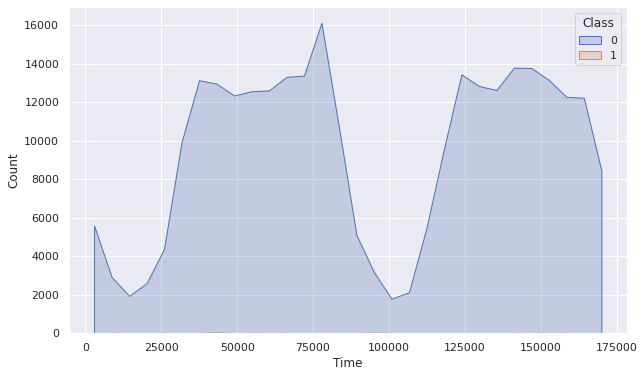

In [66]:
# distribution of time
sns.histplot(x = 'Time', data = creditcard_data, bins = 30, hue = 'Class', element = 'poly')
plt.show()

We see that the fraud transactions are a very small part of the dataset

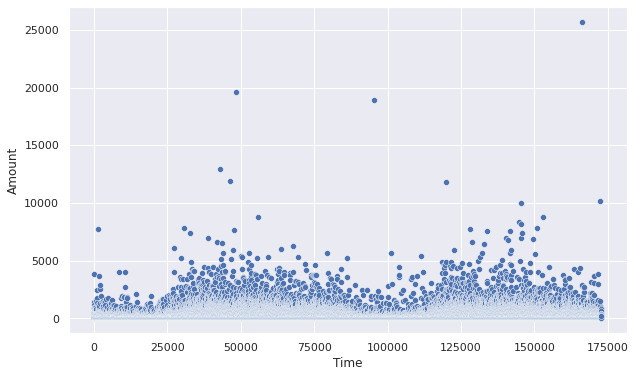

In [67]:
# compare time and amount
sns.scatterplot(x = 'Time', y = 'Amount', data = creditcard_data)
plt.show()

There seem to be no correlation between time and amount. Let us see a correlation heatmap of these features

In [68]:
corr = creditcard_data['Time'].corr(creditcard_data['Amount'])
print(corr)

-0.01059637338902924


There is no correlation as value is almost zero

In [69]:
# what are the class value
creditcard_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Of all 91200 entries only 211 transactions are fraud. This establishes that our dataset is hignly imbalanced. We willl be putting this into consideration when modeling.

## Handing Missing Values

In [70]:
# drop all rows with missing value in class
creditcard_data.dropna(subset = ['Class'], inplace = True)
# fill others with the mean value of the columns they exist
creditcard_data.fillna(creditcard_data.mean(), inplace = True)

# checking if one row was dropped
print('There are ' + str(creditcard_data.shape[0]) + ' left')

# checking if there are still missing values
missing = 0
for i in creditcard_data.isnull().sum():
  if i != 0:
    missing = missing + i
    print('There are still ' + str(missing) + ' values')
print('All missing values have been replaced')
# print(creditcard_data.isnull().sum())

There are 284807 left
All missing values have been replaced


## Modeling Imbalanced Dataset with Logistic Regression

In [71]:
# splitting train and test set
scaler = StandardScaler()
X = creditcard_data.drop('Class', axis = 1)
X_scaled = scaler.fit_transform(X)
y = creditcard_data['Class'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y , test_size = 0.3, random_state = 4, stratify = y)

# doing the machine learning
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)
acc_score = accuracy_score(ytest, ypred)

#### Evaluating Model

In [72]:
# accuracy on train data 
acc_train = accuracy_score(ytrain, logreg.predict(Xtrain))
print('Score on train data :', acc_train)

# accuracy on test data 
acc_test = accuracy_score(ytest, ypred)
print('Score on test data:', acc_test)

Score on train data : 0.9992726871451215
Score on test data: 0.9992977774656788


Model seems to perform well as it has high accuracy scores. But let us check its confusion matrix.

In [73]:
con_matrix = confusion_matrix(ytest, ypred)
con_matrix_df = pd.DataFrame(con_matrix, columns = [0, 1])
print(con_matrix_df)

       0    1
0  85277   18
1     42  106


In [74]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.72      0.78       148

    accuracy                           1.00     85443
   macro avg       0.93      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [75]:
# since we cannot afford to wrongly predict a fraud case, precision will be a good evaluation metric
print(precision_score(ytest, ypred))

0.8548387096774194


11 fraud cases out of 48 were predicted wrongly and this is not good as we cannot afford to wrongly predict a fraud case. Also the precision score is somewhat low. Lets look at other ways to improve this model

## Modeling an undersampled dataset with Logistic Regression

Here we undersample the dataset to see if the imbalance had an effect on the precision score earlier. However, undersampling is really advised as useful data may be lost.

In [76]:
# seperate data into diff classes for analysis
legit = creditcard_data[creditcard_data.Class == 0]
fraudulent = creditcard_data[creditcard_data.Class == 1]

print(legit.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [77]:
fraudulent.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [78]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [79]:
# undersampling legit data
legit_samples = legit.sample(85)
new_dataset = pd.concat([legit_samples, fraudulent], axis = 0)
print(new_dataset.shape)

(577, 31)


In [80]:
# seperating new_dataset into features and target 
scaler = StandardScaler()
X = new_dataset.drop('Class', axis = 1)
X_scaled = scaler.fit_transform(X)
y = new_dataset['Class'].values

# splitting train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y , test_size = 0.3, random_state = 4, stratify = y)

# doing the machine learning
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)
acc_score = accuracy_score(ytest, ypred)

#### Evaluation

In [81]:
print(acc_score)

0.9482758620689655


Accuracy score is great but let's look at the confusion matrix and precision score

In [82]:
con_matrix = confusion_matrix(ytest, ypred)
con_matrix_df = pd.DataFrame(con_matrix, columns = [0, 1])
print(con_matrix_df)

    0    1
0  22    4
1   5  143


In [83]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.97      0.97      0.97       148

    accuracy                           0.95       174
   macro avg       0.89      0.91      0.90       174
weighted avg       0.95      0.95      0.95       174



In [84]:
print(precision_score(ytest, ypred))

0.9727891156462585


We see that model seem to have improve as only one fraud case was predicted wrongly and we now have a higher precision score of 0.98. However we still have 6 out of 31 legit transactions were predicted as fraud. Even though predicting a legit transaction wrongly is not so costly for us, undersampling already made us loose a lot of data. So, we will be seeing how this model performance with an oversampled dataset.

## Modeling an oversampled dataset with Logistic Regression

We are now going to create a model with oversampled dataset. Entries containing the fraud cases are going to be resample to create a more balanced dataset in which we will be loosing no data.

In [85]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [95]:
# splitting into features and target
X = creditcard_data.drop('Class', axis = 1)
y = creditcard_data['Class']

# over sampling 
X_res, y_res = sm.fit_resample(X, y)

In [96]:
creditcard_data.shape

(284807, 31)

In [97]:
print(creditcard_data[data.Class == 1].shape)
print(creditcard_data[data.Class == 0].shape)

(492, 31)
(284315, 31)


In [98]:
resampled_data = pd.concat([X_res, y_res], axis = 1)
resampled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [99]:
# checking the new sample
legit = resampled_data[resampled_data.Class == 1]
fraud = resampled_data[resampled_data.Class == 0]

print(legit.shape, fraud.shape)

(284315, 31) (284315, 31)


In [100]:
# seperate into features and target for modelling
features = resampled_data.drop('Class', axis = 1) 
target = resampled_data['Class']

# scale features
feature_scaled = StandardScaler().fit_transform(features)

# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, target, test_size = 0.3, random_state = 1)

# model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

# evaluating model
accuracytest = accuracy_score(y_test, ypred)
print('Accuracy on test data :', accuracytest)

# on train data
accuracytrain = accuracy_score(y_train, model.predict(X_train)) 
print(accuracytrain)

Accuracy on test data : 0.9798580213261113
0.9804768855469662


In [101]:
# classification report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85428
           1       0.99      0.97      0.98     85161

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [102]:
# precision score
print(precision_score(y_test, ypred))

0.9903519614078456


In [103]:
# recall score
print(recall_score(y_test, ypred))

0.96909383403201


Accuracy is high, precision is high and recall is equally good. With a simple Logistic regression will have been able to achieve an almost perfect model. It also performs well on both training and test data